## Visualización de predicción del modelo final

- [Jorge Esteban Mendoza Ortiz](mailto:esteban.mendoza@ciencias.unam.mx) (418002863)

- [Enrique Moctezuma González](mailto:enriquemg@ciencias.unam.mx) (315019344)

- [Ana Victoria López Rodríguez](mailto:anaviclopez@ciencias.unam.mx) (314614300) 

In [1]:
require(tidyverse)
require(lubridate)
require(repr)
require(tikzDevice)

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: repr
Loading required package: tikzDevice


In [2]:
# Carga y formato de datos
data = read.csv("data/infectados.csv", stringsAsFactors = FALSE) %>%
    mutate(fecha = dmy(fecha))

original = data %>%
    filter(fecha <= dmy("14-05-2009")) %>%
    mutate(Datos="Originales")


data_sim = read.csv("data/simulated_SIR.csv")
names(data_sim) = c("t", "S", "I", "R")

simulated = data_sim %>%
    select(t, I) %>%
    filter(t <= 48) %>%
    mutate(fecha=dmy("27-03-2009") + days(t), Datos="Simulados") %>%
    select(-t)


# Datos unificados
df = rbind(original, simulated)


png 
  2

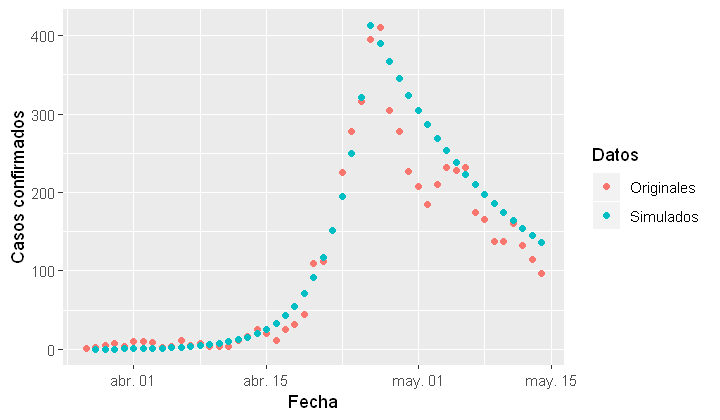

In [3]:
# Generación de figuras
options(repr.plot.width=6, repr.plot.height=3.5)

g = ggplot(df, aes(x=fecha, y=I, color=Datos)) + 
    geom_point() + xlab("Fecha") + ylab("Casos confirmados")

g

tikz(file = "figures/comparacion.tex", width = 6, height = 3.5)
g
dev.off()
